## Mixed Integer Linear Programming
In a MILP-Problem, some variables are restricted to be integers. This Problem is NO-complete.
MILP can be used in many applications area, like production planning, scheduling and many more. 
There are many algorithms to solve MILP-Problems.


<U>Example:</U><br>
We consider the following maximization problem:
\begin{alignat*}{3}
    \text{maximize} \quad & 2x + y + 3z \\
    \text{subject to} \quad
    & x + 2y + z     &\leq\ & 4 \\
    &     y + 2z     &\leq\ & 5 \\
    & x + y          &\geq\ & 1 \\
    & y,\, z         &\geq\ & 0 \\
    & x              &\in\  & \{0,1\} \\
    & z              &\in\  & \mathbb{Z}
\end{alignat*}

First, we will present the programme graphically:

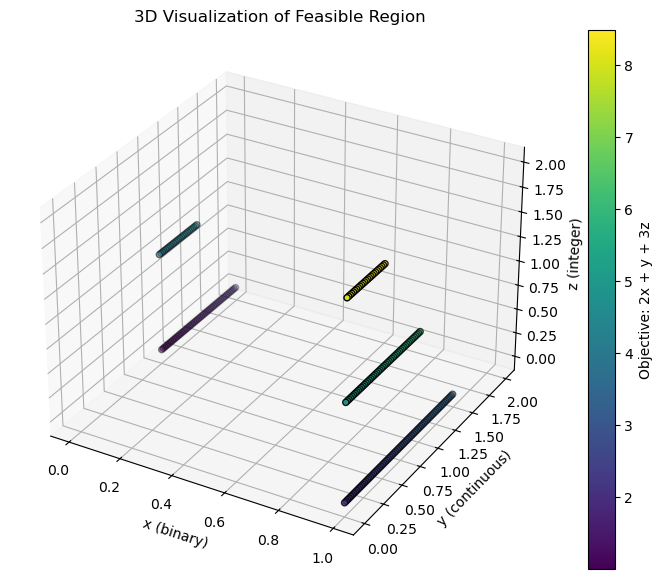

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the domain for variables
x_vals = [0, 1]  # x is binary
z_vals = np.arange(0, 6)  # z is integer
y_vals = np.linspace(0, 6, 300)  # y is continuous

# List to store all feasible points and their objective values
feasible_points = []

# Loop over all possible combinations
for x in x_vals:
    for z in z_vals:
        for y in y_vals:
            # Constraints:
            c1 = x + 2*y + z <= 4
            c2 = y + 2*z <= 5
            c3 = x + y >= 1
            nonnegativity = y >= 0 and z >= 0

            if c1 and c2 and c3 and nonnegativity:
                obj = 2*x + y + 3*z  # Objective function
                feasible_points.append((x, y, z, obj))

# Prepare the 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates and objective values
xs = [x for (x, y, z, obj) in feasible_points]
ys = [y for (x, y, z, obj) in feasible_points]
zs = [z for (x, y, z, obj) in feasible_points]
objs = [obj for (x, y, z, obj) in feasible_points]

# 3D scatter plot: each point is a feasible solution
scatter = ax.scatter(xs, ys, zs, c=objs, cmap='viridis', edgecolor='k')

# Axis labels
ax.set_xlabel('x (binary)')
ax.set_ylabel('y (continuous)')
ax.set_zlabel('z (integer)')
ax.set_title('3D Visualization of Feasible Region')

# Add a color bar to indicate objective function values
fig.colorbar(scatter, ax=ax, label='Objective: 2x + y + 3z')

# Show the plot
plt.show()

### Solving of the Problem using Gurobipy

In [7]:
from gurobipy import *

# create the model
milp_model = Model('MILP')

# add the decision variables
x = milp_model.addVar(vtype=GRB.BINARY, name = 'x')
y = milp_model.addVar(vtype=GRB.CONTINUOUS, lb = 0, name = 'y')
z = milp_model.addVar(vtype=GRB.INTEGER, lb = 0, name = 'z')

# set the objective function
milp_model.setObjective(2*x + y + 3*z, GRB.MAXIMIZE)

# add the constraints
c1 = milp_model.addConstr(x + 2*y + z <= 4, name = 'c1')
c2 = milp_model.addConstr(y + 2*z <= 5, name = 'c2')
c3 = milp_model.addConstr(x + y >= 1, name = 'c3')

# solve the model
milp_model.optimize()
#milp_model.write('MILP Model.lp')

# output of the results
print('-------------------------------------------------------------------------')
print('Objective Function value: %.2f' % milp_model.objVal)
for v in milp_model.getVars():
    print('%s: %g' % (v.varName, v.x))

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3 rows, 3 columns and 7 nonzeros
Model fingerprint: 0x8a1c7e4e
Variable types: 1 continuous, 2 integer (1 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 3.5000000
Presolve removed 3 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 8.5 3.5 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.500000000000e+00, best bound 8.500000000000e+00, gap 0.0000%
-----------------------------------------